In [1]:
from pyciemss import PetriNetODE

In [2]:
import os

from pyciemss.PetriNetODE.base import BetaNoisePetriNetODESystem
from pyciemss.PetriNetODE.interfaces import load_petri_model, setup_model, sample, calibrate
import pyciemss
import numpy as np

Let's see what directory we're in

In [3]:
os.getcwd()

'/home/chads/git/pyciemss/notebook'

Most of our files are relative to `test/models/`, so we need to go up a directory.

In [4]:
PYCIEMSS_PATH = ".."
STARTERKIT_PATH = os.path.join(PYCIEMSS_PATH, "test/models/starter_kit_examples/")
MIRA_PATH = os.path.join(PYCIEMSS_PATH, "test/models/evaluation_examples/")

filename = "CHIME-SIR/model_petri.json"
filename = os.path.join(STARTERKIT_PATH, filename)

model = BetaNoisePetriNetODESystem.from_mira(filename)

model = setup_model(model, start_time=0.0, start_state=dict(S=0.99, I=0.01, R=0.0))

In [5]:
import matplotlib.pyplot as plt

def plot_sample(times, s, names, alpha=1, **kwargs):
    for i,name in enumerate(names):
        for trajectory in s[name]:
            plt.plot(times, trajectory, label=name, alpha=alpha, color='C' + str(i), **kwargs)

In [10]:
times = np.linspace(0.01, 30, 100)
num_samples = 100
data = sample(model, times, num_samples)

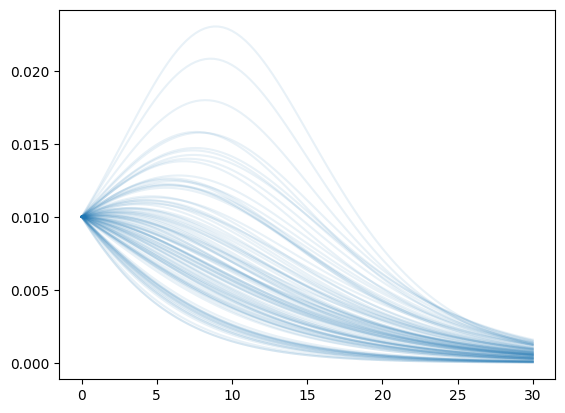

In [11]:
plot_sample(times, data, ('I_sol',), alpha=0.1)

Now let's condition on the first of these trajectories

In [15]:
obs = [(times[j], 
        {var: float(data[var + "_sol"][0,j]) for var in ["S", "I", "R"]})
    for j in range(0, len(times)) ]

In [17]:
post = calibrate(model, obs)
post

AutoNormal(
  (locs): PyroModule()
  (scales): PyroModule()
)

In [22]:
post_sample = sample(model, np.linspace(0.01, 30, 100), 100, inferred_parameters=post)

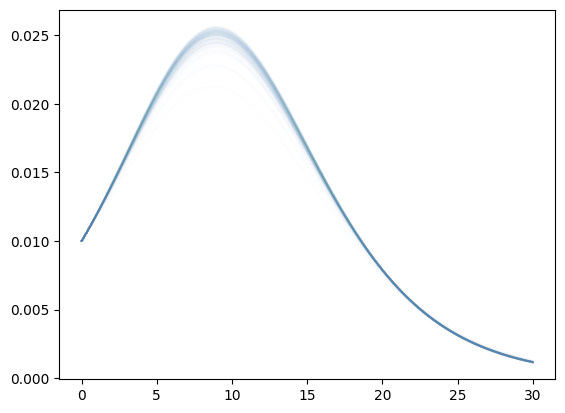

In [24]:
plot_sample(times, post_sample, ('I_sol',), alpha=0.01)